## EDA

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Grape_dataset",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 9023 files belonging to 4 classes.


In [4]:
# Check the class names and number of classes
class_names = dataset.class_names
num_classes = len(class_names)
print(f'Classes: {class_names}')
print(f'Number of classes: {num_classes}')

# Check the shape of the batches
for images, labels in dataset.take(1):
    print(f'Image shape: {images.shape}')
    print(f'Label shape: {labels.shape}')


Classes: ['Black Rot', 'Esca (Black Measles)', 'Healthy', 'Leaf Blight']
Number of classes: 4
Image shape: (32, 256, 256, 3)
Label shape: (32,)


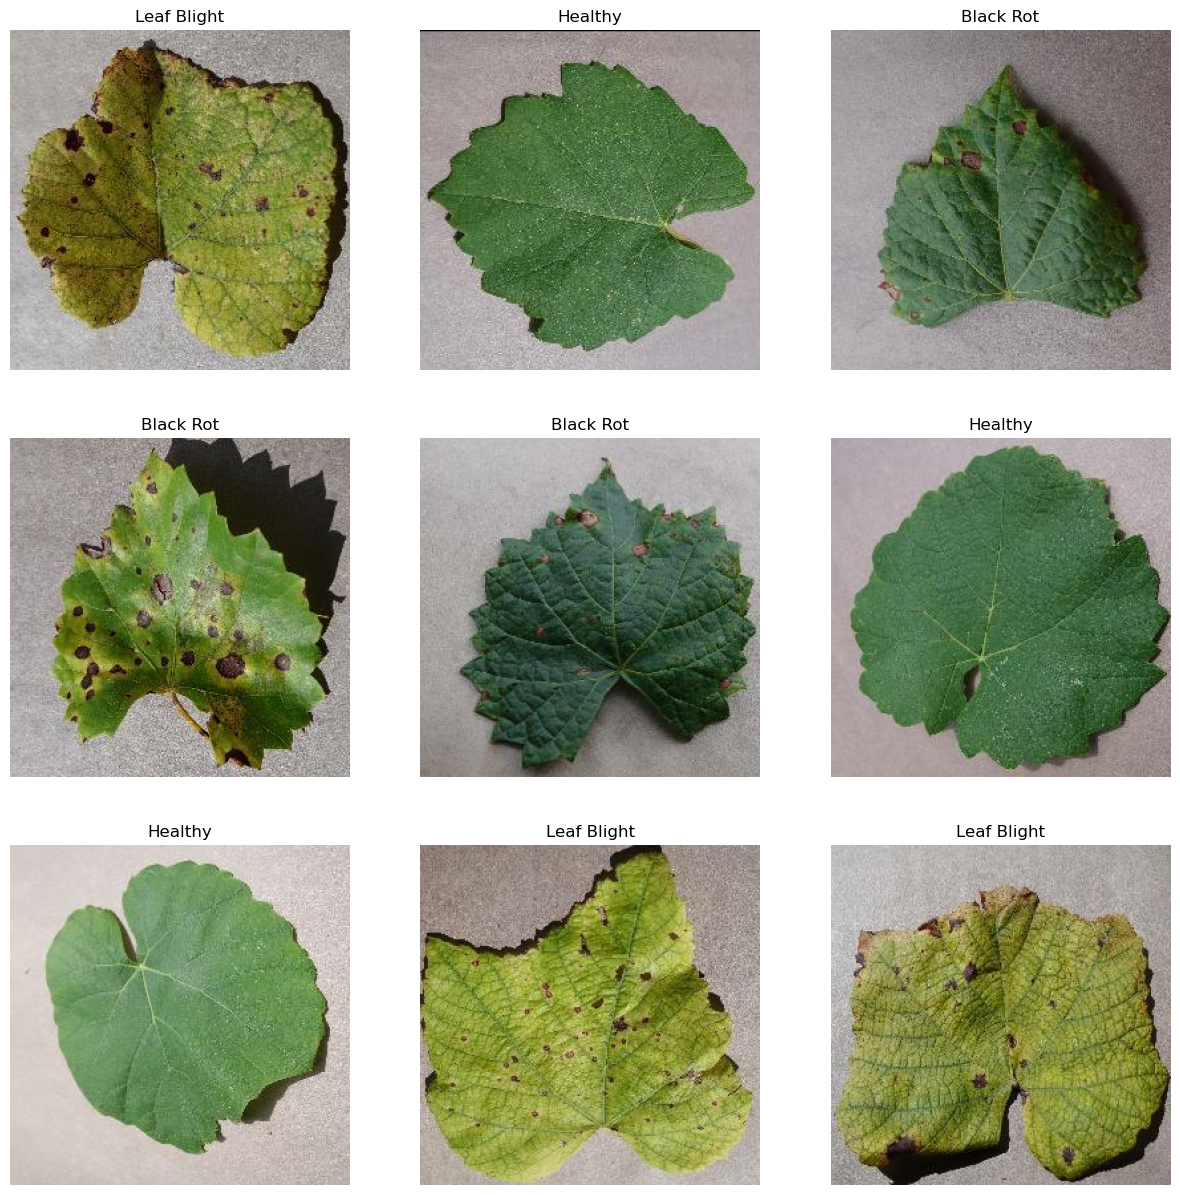

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


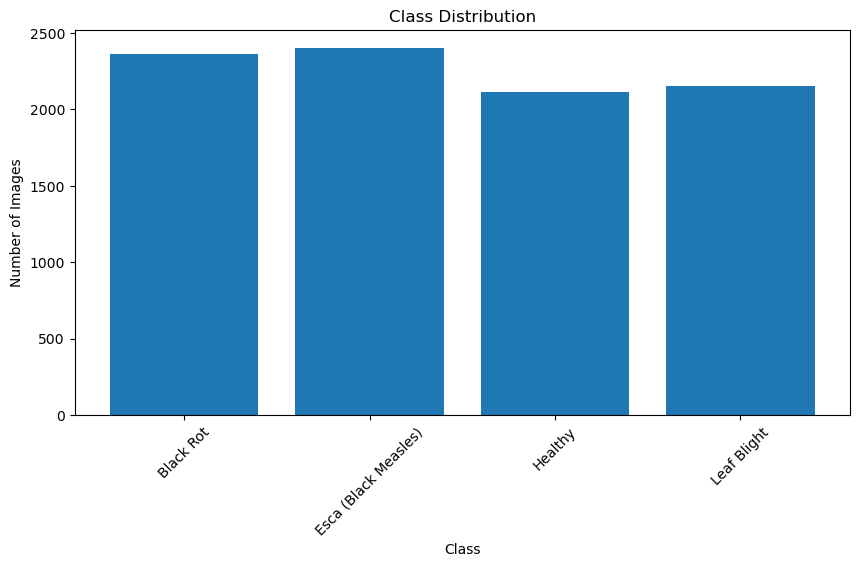

In [10]:
import matplotlib.pyplot as plt
import numpy as np

class_names = dataset.class_names  # Get class names from the dataset
class_counts = np.array([len(os.listdir(f"Grape_dataset/{class_name}")) for class_name in class_names])

plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


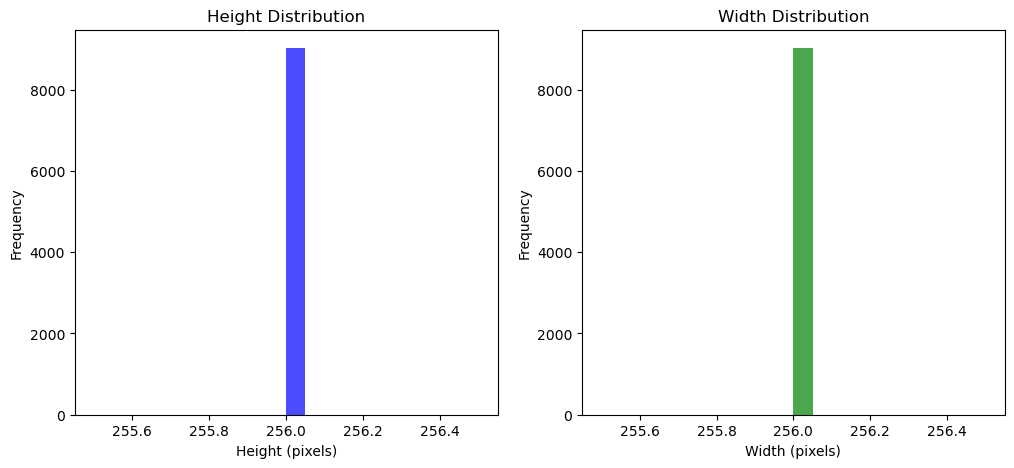

In [12]:
# Initialize lists to store heights and widths
heights = []
widths = []

# Iterate over the dataset to get image dimensions
for images, _ in dataset.unbatch():
    # Get the shape of each image
    height, width = images.shape[0], images.shape[1]
    heights.append(height)
    widths.append(width)

# Now plot the distributions of heights and widths
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(heights, bins=20, color='blue', alpha=0.7)
plt.title('Height Distribution')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(widths, bins=20, color='green', alpha=0.7)
plt.title('Width Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.show()


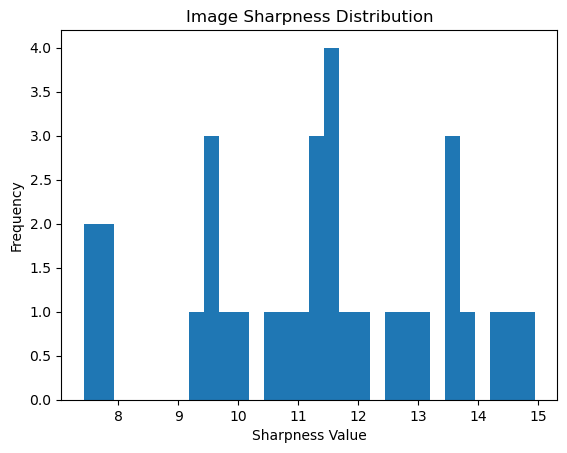

In [9]:
from skimage import filters

sharpness_values = []

for images, _ in dataset.take(1):  # Take only a batch for evaluation
    for img in images:
        sharpness = filters.sobel(tf.image.rgb_to_grayscale(img).numpy())
        sharpness_values.append(np.mean(sharpness))

plt.hist(sharpness_values, bins=30)
plt.title('Image Sharpness Distribution')
plt.xlabel('Sharpness Value')
plt.ylabel('Frequency')
plt.show()

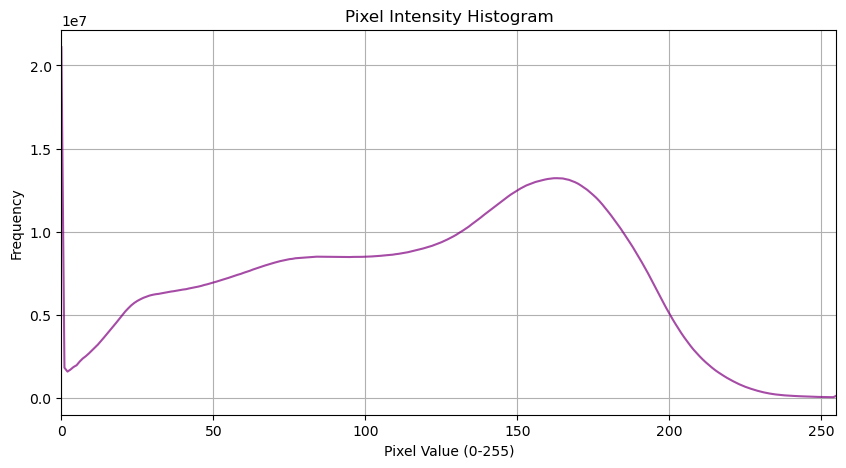

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize a histogram
pixel_counts = np.zeros(256, dtype=int)

# Iterate over the dataset
for images, _ in dataset:
    for img in images:
        # Convert the image to a numpy array and flatten it
        pixel_values = img.numpy().flatten()
        
        # Update histogram counts for the pixel values
        hist, _ = np.histogram(pixel_values, bins=256, range=(0, 255))
        pixel_counts += hist

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.plot(pixel_counts, color='purple', alpha=0.7)
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.grid()
plt.show()

In [15]:
mean_pixel = np.mean(pixel_values)
median_pixel = np.median(pixel_values)
std_pixel = np.std(pixel_values)

print(f'Mean Pixel Value: {mean_pixel:.2f}')
print(f'Median Pixel Value: {median_pixel:.2f}')
print(f'Standard Deviation of Pixel Values: {std_pixel:.2f}')


Mean Pixel Value: 111.76
Median Pixel Value: 119.00
Standard Deviation of Pixel Values: 41.30
